# Introduction to geopandas for analyzing spatial data

[*Geopandas*](https://geopandas.readthedocs.io/en/v0.3.0/) is an excellent extension to the [*Pandas*](http://pandas.pydata.org/pandas-docs/stable/) package for working with tabular data that is georeferenced - for example, Points, Lines, and Polygons that have associated attributes. Geopandas draws upon other great libraries including Shapely and Fiona.

There are a lot of tutorials out there, in particular the UW Geohackweek material (https://geohackweek.github.io/vector/)! 

This notebook is simply another set of examples that serves as a starting point for a [Data Science for Social Good (DSSG 2018)](http://escience.washington.edu/get-involved/incubator-programs/data-science-for-social-good/) summer project.

## This notebook will cover the following topics:

* dataset exploration
* basic statistical analysis
* exporting data for GIS software

In [1]:
# import all the libraries we are going to use
import geopandas as gpd
import shapely
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# First thing to note is that many geospatial python packages are under active development
# and updated regularly. So the version you're using today will likely be updated in the near 
# future!
print('Geopandas version: ', gpd.__version__)
print('Pandas version: ', gpd.pd.__version__)

Geopandas version:  0.3.0
Pandas version:  0.23.0


In [3]:
# Geopandas has convenient methods for reading tabluar data, in this case we have 2 CSV files:
!ls -lh *csv

-rw-r--r--@ 1 scott  staff   2.6M Jun 10 19:15 Dist_Out.csv
-rw-r--r--@ 1 scott  staff   181K Jun 10 19:15 Places_Full.csv


In [4]:
# Note that the 'places' information has 9 columns with labels in the first row
!head Places_Full.csv

In [5]:
# And the distance data has information about transit between two places
!head Dist_Out.csv

# Places

In [6]:
# Let's work with the smaller 'Places_Full.csv' first
# All Pandas methods are accessed via the 'pd' attribute.
# Since the file is well-formatted, it is easily read in:
df = gpd.pd.read_csv('Places_Full.csv')

In [7]:
# 'df' stands for 'Data Frame'. It is essentially a spreadsheet:
df.head()

,name,address,city,lat,lng,place_id,rating,class,type
0,Trader Joe's,1700 East Madison Street,Seattle,47.615866,-122.309913,ChIJx0M1ztNqkFQRtgspEllQxk8,4.5,supermarket,NaN
1,Hillcrest Market,110 Summit Avenue East,Seattle,47.618850,-122.325005,ChIJt5emCTMVkFQR-BCgFDTvu9o,3.5,supermarket,NaN
2,Uwajimaya,600 5th Avenue South,Seattle,47.596843,-122.326929,ChIJq9nX27xqkFQRu05rxkrN7f4,4.5,supermarket,NaN
3,Kress IGA Supermarket,1427 3rd Avenue,Seattle,47.609396,-122.337822,ChIJbdIhoLNqkFQRMTiHCN6W4nU,3.9,supermarket,NaN
4,Double Dorjee,1501 Pike Street # 511,Seattle,47.608822,-122.339570,ChIJkX3s-LJqkFQRQRexqCN0jQY,5.0,supermarket,NaN


In [8]:
# The dataframe has a lot of convenient methods for fast data exploration
# Start with info to confirm that things were read in correctly
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 9 columns):
name        1616 non-null object
address     1520 non-null object
city        1540 non-null object
lat         1616 non-null float64
lng         1616 non-null float64
place_id    1616 non-null object
rating      1449 non-null float64
class       1616 non-null object
type        15 non-null object
dtypes: float64(3), object(6)
memory usage: 113.7+ KB


In [9]:
df.describe()

,lat,lng,rating
count,1616.000000,1616.000000,1449.000000
mean,47.619907,-122.321132,4.194134
std,0.056363,0.049129,0.638952
min,47.455556,-122.411493,1.000000
25%,47.586566,-122.347183,3.900000
50%,47.614611,-122.328568,4.300000
75%,47.661334,-122.309480,4.600000
max,47.790207,-122.114213,5.000000


In [10]:
# Gotcha within geopandas. columns can be accessed as dictionary items:
df['class'].unique()

array(['supermarket', 'library', 'hospital', 'pharmacy', 'post_office',
       'school', 'cafe', 'urban village', 'destination park', 'citywide'],
      dtype=object)

In [11]:
# Or accessed as attributes for faster typing:
# NOTE: seems there is bug in v 0.3 since the attribute 'class' is reserved for internal use:
df.class.unique()

SyntaxError: invalid syntax (<ipython-input-11-36c7eb62b2b8>, line 3)

In [12]:
# let's change the name of class to avoid that error
df.rename(columns={'class':'place_class'}, inplace=True)
df.place_class.unique()

array(['supermarket', 'library', 'hospital', 'pharmacy', 'post_office',
       'school', 'cafe', 'urban village', 'destination park', 'citywide'],
      dtype=object)

In [13]:
df.city.unique()

array(['Seattle', 'Medina', 'Mercer Island', 'Shoreline', 'Edmonds',
       'Tukwila', 'Kenmore', 'Kirkland', 'Lake Forest Park', 'Bothell',
       'Renton', 'Bellevue', 'Newcastle', 'SeaTac', 'Burien', nan],
      dtype=object)

In [14]:
# That last one shows us a common issue with tabular data - certain measurements don't always
# fit into the defined columns or are missing data, and therefore filled with 'not-a-number (nan)'
# Let's look at the trouble rows
dfNan = df[df.city.isna()]

In [15]:
dfNan

,name,address,city,lat,lng,place_id,rating,place_class,type
1540,12th Avenue,NaN,NaN,47.608315,-122.317345,12th-Avenue,NaN,urban village,NaN
1541,23rd & Union-Jackson,NaN,NaN,47.603145,-122.306682,23rd-&-Union-Jackson,NaN,urban village,NaN
1542,Admiral,NaN,NaN,47.582350,-122.386420,Admiral,NaN,urban village,NaN
1543,Aurora-Licton Springs,NaN,NaN,47.696854,-122.345977,Aurora-Licton-Springs,NaN,urban village,NaN
1544,Ballard,NaN,NaN,47.670593,-122.382603,Ballard,NaN,urban village,NaN
1545,Ballard-Interbay-Northend,NaN,NaN,47.659726,-122.372020,Ballard-Interbay-Northend,NaN,urban village,NaN
1546,Belltown,NaN,NaN,47.614435,-122.347341,Belltown,NaN,urban village,NaN
1547,Bitter Lake Village,NaN,NaN,47.728560,-122.350653,Bitter-Lake-Village,NaN,urban village,NaN
1548,Capitol Hill,NaN,NaN,47.620316,-122.319866,Capitol-Hill,NaN,urban village,NaN
1549,Chinatown-International District,NaN,NaN,47.597980,-122.325308,Chinatown-International-District,NaN,urban village,NaN


In [16]:
# Commonly, there at latitude, longitude columns for places, but we must tell geopandas 
# explicity what the geometries (Points) and coordinate reference is (EPSG:4326)
# https://geopandas.readthedocs.io/en/v0.3.0/projections.html#coordinate-reference-systems

# Once identified, we'll have a "Geodataframe (gf)":
geometries = [shapely.geometry.Point(xy) for xy in zip(df.lng, df.lat)]
crs = {'init': 'epsg:4326'}
gf = gpd.GeoDataFrame(df, crs=crs, geometry=geometries)

In [17]:
gf.head()

,name,address,city,lat,lng,place_id,rating,place_class,type,geometry
0,Trader Joe's,1700 East Madison Street,Seattle,47.615866,-122.309913,ChIJx0M1ztNqkFQRtgspEllQxk8,4.5,supermarket,NaN,POINT (-122.3099133 47.6158665)
1,Hillcrest Market,110 Summit Avenue East,Seattle,47.618850,-122.325005,ChIJt5emCTMVkFQR-BCgFDTvu9o,3.5,supermarket,NaN,POINT (-122.3250047 47.6188496)
2,Uwajimaya,600 5th Avenue South,Seattle,47.596843,-122.326929,ChIJq9nX27xqkFQRu05rxkrN7f4,4.5,supermarket,NaN,POINT (-122.326929 47.596843)
3,Kress IGA Supermarket,1427 3rd Avenue,Seattle,47.609396,-122.337822,ChIJbdIhoLNqkFQRMTiHCN6W4nU,3.9,supermarket,NaN,POINT (-122.3378216 47.60939570000001)
4,Double Dorjee,1501 Pike Street # 511,Seattle,47.608822,-122.339570,ChIJkX3s-LJqkFQRQRexqCN0jQY,5.0,supermarket,NaN,POINT (-122.3395702 47.608822)


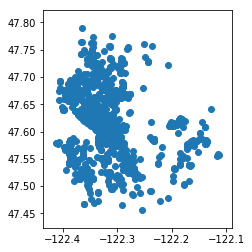

In [18]:
# Geopandas has some convenient built-in plotting methods
# We'll look at other libraries called cartopy and folium next
gf.plot()

In [19]:
# A convenient way to visualize spatial data is to save as geojson and
# upload to github:
gf.to_file('')

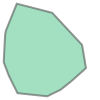

In [199]:
# We also now have access to lots of quantifiable spatial information. For example, how large
# is the area containing all these points?
#http://geopandas.org/geometric_manipulations.html
point_collection = shapely.geometry.MultiPoint(gf.geometry.tolist())
polygon = point_collection.convex_hull
polygon

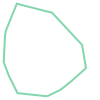

In [200]:
perimeter = polygon.boundary
perimeter

In [201]:
# You can save these geometries in a separte geodatafram as you go:
gfShape = gpd.GeoDataFrame(geometry=[polygon], crs = {'init': 'epsg:4326'})
gfShape

,geometry
0,"POLYGON ((-122.254492 47.455556, -122.3616457 ..."


In [202]:
# If you want to share the geometry / export it to a GIS program for further analysis:
# Default is ESRI shapefile, but Geojson or Geopackage, etc should work to
#http://geopandas.org/io.html
gfShape.to_file('myshape.shp')

In [203]:
# We digress... what about that question about area?
# Step 1) convert to a local coordinate system in metric units of distance!
# Typically, Universal Transverse Mercator or Google Mercator (https://epsg.io/3857) is used:
gfShape.to_crs({'init': 'epsg:3857'}, inplace=True)

In [204]:
# will be in units of km^2
area = gfShape.area.values * 1e-6
print(f'Points are within an area of {area} km^2')
# NOTE: rember to honor significant figures if reporting this number!

Points are within an area of [1320.32933972] km^2


# Distances

In [205]:
dfD = gpd.pd.read_csv('Dist_Out.csv')

In [206]:
dfD.head()

,class,departure_time,distance.value,duration.value,duration_in_traffic.value,end_lat,end_lon,fare.value,mode,origin,pair,place_id,rank,start_lat,start_lon,status
0,hospital,2018-06-06 12:41:26,1.475451,32.183333,NaN,47.716034,-122.312230,NaN,walking,530330001003,530330001003-ChIJEerXpl0RkFQRDOjfwBQDzlA,ChIJEerXpl0RkFQRDOjfwBQDzlA,1,47.72281,-122.28945,OK
1,cafe,2018-06-06 12:41:26,0.430702,9.133333,NaN,47.719859,-122.295224,NaN,walking,530330001003,530330001003-ChIJ17BqS3sRkFQR31AY2_7b1Vg,ChIJ17BqS3sRkFQR31AY2_7b1Vg,1,47.72281,-122.28945,OK
2,pharmacy,2018-06-06 12:41:26,0.494717,10.200000,NaN,47.719527,-122.295845,NaN,walking,530330001003,530330001003-ChIJ8fdfu2QRkFQRvoCQ1-nxHo0,ChIJ8fdfu2QRkFQRvoCQ1-nxHo0,2,47.72281,-122.28945,OK
3,pharmacy,2018-06-06 12:41:26,0.167185,3.416667,NaN,47.723967,-122.292140,NaN,walking,530330001003,530330001003-ChIJi_xMRXoRkFQRhfEsI71aRq8,ChIJi_xMRXoRkFQRhfEsI71aRq8,1,47.72281,-122.28945,OK
4,pharmacy,2018-06-06 12:41:26,0.812306,16.483333,NaN,47.733500,-122.291991,NaN,walking,530330001003,530330001003-ChIJKXaRMp4RkFQRr9i6RGtJ8Uo,ChIJKXaRMp4RkFQRr9i6RGtJ8Uo,3,47.72281,-122.28945,OK


In [207]:
dfD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
class                        15000 non-null object
departure_time               15000 non-null object
distance.value               15000 non-null float64
duration.value               15000 non-null float64
duration_in_traffic.value    0 non-null float64
end_lat                      15000 non-null float64
end_lon                      15000 non-null float64
fare.value                   2891 non-null float64
mode                         15000 non-null object
origin                       15000 non-null int64
pair                         15000 non-null object
place_id                     15000 non-null object
rank                         15000 non-null int64
start_lat                    15000 non-null float64
start_lon                    15000 non-null float64
status                       15000 non-null object
dtypes: float64(8), int64(2), object(6)
memory usage: 1.8+ MB


In [255]:
# Indexing is the same as with pandas:
dfD.iloc[0]

class                                                        hospital
departure_time                                    2018-06-06 12:41:26
distance.value                                                1.47545
duration.value                                                32.1833
duration_in_traffic.value                                         NaN
end_lat                                                        47.716
end_lon                                                      -122.312
fare.value                                                        NaN
mode                                                          walking
origin                                                   530330001003
pair                         530330001003-ChIJEerXpl0RkFQRDOjfwBQDzlA
place_id                                  ChIJEerXpl0RkFQRDOjfwBQDzlA
rank                                                                1
start_lat                                                     47.7228
start_lon           

In [256]:
# I'm guessing the distance is in miles and the time is minutes. Let's see if that makes sense:
# We could turn this into a separate geodataframe, but we have destination (place_id) 
# in the earlier geodataframe 'gf'
row = 0
dest = dfD.place_id.iloc[row]
gf.query('place_id == @dest')

,name,address,city,lat,lng,place_id,rating,place_class,type,geometry
313,Elevated Natural Health,12000 15th Avenue Northeast Suite C,Seattle,47.716034,-122.31223,ChIJEerXpl0RkFQRDOjfwBQDzlA,5.0,hospital,NaN,POINT (-122.3122296 47.7160344)


In [233]:
# So let's use the start_lat, start_lon for this geodataframe
geometries = [shapely.geometry.Point(xy) for xy in zip(dfD.start_lon, dfD.start_lat)]
crs = {'init': 'epsg:4326'}
gfD = gpd.GeoDataFrame(dfD, crs=crs, geometry=geometries)

In [234]:
dfD.iloc[0]

class                                                        hospital
departure_time                                    2018-06-06 12:41:26
distance.value                                                1.47545
duration.value                                                32.1833
duration_in_traffic.value                                         NaN
end_lat                                                        47.716
end_lon                                                      -122.312
fare.value                                                        NaN
mode                                                          walking
origin                                                   530330001003
pair                         530330001003-ChIJEerXpl0RkFQRDOjfwBQDzlA
place_id                                  ChIJEerXpl0RkFQRDOjfwBQDzlA
rank                                                                1
start_lat                                                     47.7228
start_lon           

In [235]:
# To get distance let's convert once again to Google Mercator
gf_merc = gf.to_crs({'init': 'epsg:3857'})
gfD_merc = gfD.to_crs({'init': 'epsg:3857'})

In [248]:
# Let's do a sanity check for distance for this first pair:
pointDest = gf_merc.query('place_id == @dest').geometry.values[0]
pointDest.coords.xy

(array('d', [-13615735.11686196]), array('d', [6059742.4274001075]))

In [252]:
pointOrig = gfD_merc.geometry.iloc[0]
pointOrig.coords.xy

(array('d', [-13613199.30338949]), array('d', [6060863.561797484]))

In [254]:
dist_m = pointDest.distance(pointOrig)
print('Distance in meters: ', dist_m)
print('Distance in miles: ', dist_m/1609.34)

Distance in meters:  2772.5966717397077
Distance in miles:  1.7228159815450481


In [257]:
# measuring the straight line distance in google earth i get (1.87 km, 1.16 miles)
# it makes sense if this is a walking trip that the reported distances would be a bit larger!

In [258]:
# That was kind of complicated for one point, but it's now easy to quickly get all the 
# straight-line distances between origins and a particular destination:
pId = 'ChIJEerXpl0RkFQRDOjfwBQDzlA'
pointDest = gf_merc.query('place_id == @pid').geometry.values[0]
gfDest = gfD_merc.query('place_id == @pid')
gfDest
# NOTE: lots of the same origin-id. Is that the same person?

,class,departure_time,distance.value,duration.value,duration_in_traffic.value,end_lat,end_lon,fare.value,mode,origin,pair,place_id,rank,start_lat,start_lon,status,geometry
0,hospital,2018-06-06 12:41:26,1.475451,32.183333,NaN,47.716034,-122.31223,NaN,walking,530330001003,530330001003-ChIJEerXpl0RkFQRDOjfwBQDzlA,ChIJEerXpl0RkFQRDOjfwBQDzlA,1,47.72281,-122.28945,OK,POINT (-13613199.30338949 6060863.561797484)
25,hospital,2018-06-06 12:41:27,1.574891,13.633333,NaN,47.716034,-122.31223,NaN,bicycling,530330001003,530330001003-ChIJEerXpl0RkFQRDOjfwBQDzlA,ChIJEerXpl0RkFQRDOjfwBQDzlA,1,47.72281,-122.28945,OK,POINT (-13613199.30338949 6060863.561797484)
50,hospital,2018-06-06 12:41:27,1.574891,6.700000,NaN,47.716034,-122.31223,NaN,driving,530330001003,530330001003-ChIJEerXpl0RkFQRDOjfwBQDzlA,ChIJEerXpl0RkFQRDOjfwBQDzlA,1,47.72281,-122.28945,OK,POINT (-13613199.30338949 6060863.561797484)
75,hospital,2018-06-06 12:41:27,1.563083,12.583333,NaN,47.716034,-122.31223,2.5,transit,530330001003,530330001003-ChIJEerXpl0RkFQRDOjfwBQDzlA,ChIJEerXpl0RkFQRDOjfwBQDzlA,1,47.72281,-122.28945,OK,POINT (-13613199.30338949 6060863.561797484)
100,hospital,2018-06-06 12:41:28,1.295214,27.900000,NaN,47.716034,-122.31223,NaN,walking,530330001005,530330001005-ChIJEerXpl0RkFQRDOjfwBQDzlA,ChIJEerXpl0RkFQRDOjfwBQDzlA,1,47.72293,-122.29444,OK,POINT (-13613754.78764855 6060883.419084135)
125,hospital,2018-06-06 12:41:28,1.336234,11.583333,NaN,47.716034,-122.31223,NaN,bicycling,530330001005,530330001005-ChIJEerXpl0RkFQRDOjfwBQDzlA,ChIJEerXpl0RkFQRDOjfwBQDzlA,1,47.72293,-122.29444,OK,POINT (-13613754.78764855 6060883.419084135)
150,hospital,2018-06-06 12:41:28,1.333748,5.316667,NaN,47.716034,-122.31223,NaN,driving,530330001005,530330001005-ChIJEerXpl0RkFQRDOjfwBQDzlA,ChIJEerXpl0RkFQRDOjfwBQDzlA,1,47.72293,-122.29444,OK,POINT (-13613754.78764855 6060883.419084135)
175,hospital,2018-06-06 12:41:28,1.416408,10.983333,NaN,47.716034,-122.31223,2.5,transit,530330001005,530330001005-ChIJEerXpl0RkFQRDOjfwBQDzlA,ChIJEerXpl0RkFQRDOjfwBQDzlA,1,47.72293,-122.29444,OK,POINT (-13613754.78764855 6060883.419084135)
400,hospital,2018-06-06 12:41:31,1.564947,31.016667,NaN,47.716034,-122.31223,NaN,walking,530330006001,530330006001-ChIJEerXpl0RkFQRDOjfwBQDzlA,ChIJEerXpl0RkFQRDOjfwBQDzlA,1,47.72512,-122.33652,OK,POINT (-13618439.11182113 6061245.822600828)
425,hospital,2018-06-06 12:41:31,1.565569,10.116667,NaN,47.716034,-122.31223,NaN,bicycling,530330006001,530330006001-ChIJEerXpl0RkFQRDOjfwBQDzlA,ChIJEerXpl0RkFQRDOjfwBQDzlA,1,47.72512,-122.33652,OK,POINT (-13618439.11182113 6061245.822600828)


In [259]:
gfDest.distance(pointDest)

0      2772.596672
25     2772.596672
50     2772.596672
75     2772.596672
100    2285.512156
125    2285.512156
150    2285.512156
175    2285.512156
400    3093.830291
425    3093.830291
450    3093.830291
475    3093.830291
500    1976.250232
525    1976.250232
550    1976.250232
575    1976.250232
dtype: float64

# Joining databases

In [ ]:
# Given these two databases share a common column (place_id, we could do an "attribute" join)
# NOTE that the spatial information doesn't really matter in this case:
# http://geopandas.org/mergingdata.html

country_shapes = country_shapes.merge(country_names, on='iso_a3')

In [ ]:
https://github.com/seattleio